# Flow of the Antarctic Ice sheet
As described in the previous section, ice flows as a viscous fluid under gravity. The flow is three dimensional and preceeds at different rates in differnt locations and at different depths within an ice sheet or glacier. 

Many techniques exist for measuring the flow of ice. The most straightforward involves installing a marker in the ice surface, such as an aluminium pole, sometimes called a glacio pole, and measuring its location relative to some datum at multiple different times. This is now often done using Global Navigation Satellite System (GNSS) receivers, but traditionally was achieved using a theodelite and a local reference frame.

{numref}`fig:gps_measurement` shows an example of using a GNSS recevier to measure the position of glacio pole precisely. 



```{figure} ../../images/gps_measurement.png
---
height: 500px
name: fig:gps_measurement
---
A scientist makes notes next to an aluminium glacio pole installed in the surface of the Antarctic Ice Sheet. A GNSS receiver secured to the top of the pole makes a detailed measurement of its position, which was repeated about a year later to approximate the surface ice flow velocity in three dimensions. Each of the GNSS measurements took around 20 minutes. Because this location is close to an ice divide, the ice flow is very slow < 1 m a$^{-1}$ (Kingslake et a., 2016). Photo credit: Iain Rudkin.  
```


An alternative approach is to identify features already present on the glacier's surface and track their movement over time. One of the earliest examples of this was by the glaciologist John Nye. In 1956, on an expedition to Austerdalsbreen, an outlet of Jostedalsbreen, an ice cap in Norway, Nye took repeat photographs of a fast-moving, upstream section of the glacier over a period of around 30 days. The team then carefully recorded the relative motion of prominent features on the ice surface (crevasses and seracs) and used these measurements to compute velocities along a profile. Nye's talk, which covered this experiment and several other interesting early history from the early days of glaciology, can be found [here](https://www.youtube.com/watch?v=5w38d4GL2O4). A time lapse video of the  Austerdahlsbreen images can be found around [minute thirty-eight](https://youtu.be/5w38d4GL2O4?t=2307).

%% satellites 

In [3]:
import fsspec
import xarray as xr
mapper = fsspec.get_mapper('gs://ldeo-glaciology/MEaSUREs')
M = xr.open_zarr(mapper) 
M

<xarray.Dataset>
Dimensions:       (y: 12445, x: 12445)
Coordinates:
    lat           (y, x) float64 dask.array<chunksize=(389, 778), meta=np.ndarray>
    lon           (y, x) float64 dask.array<chunksize=(389, 778), meta=np.ndarray>
  * x             (x) float64 -2.8e+06 -2.8e+06 -2.799e+06 ... 2.799e+06 2.8e+06
  * y             (y) float64 2.8e+06 2.8e+06 2.799e+06 ... -2.799e+06 -2.8e+06
Data variables:
    CNT           (y, x) int32 dask.array<chunksize=(778, 778), meta=np.ndarray>
    ERRX          (y, x) float32 dask.array<chunksize=(778, 778), meta=np.ndarray>
    ERRY          (y, x) float32 dask.array<chunksize=(778, 778), meta=np.ndarray>
    SOURCE        (y, x) int8 dask.array<chunksize=(778, 1556), meta=np.ndarray>
    STDX          (y, x) float32 dask.array<chunksize=(778, 778), meta=np.ndarray>
    STDY          (y, x) float32 dask.array<chunksize=(778, 778), meta=np.ndarray>
    VX            (y, x) float32 dask.array<chunksize=(778, 778), meta=np.ndarray>
    VY            (y, x) float32 dask.array<chunksize=(778, 778), meta=np.ndarray>
    coord_system  |S1 ...
Attributes: (12/27)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0, GDS v2.0
    cdm_data_type:             Grid
    comment:                    
    creator_name:              J. Mouginot
    date_created:              2019-07-08T14:43:24.00005131959583Z
    ...                        ...
    spatial_resolution:        450 m
    standard_name_vocabulary:  CF Standard Name Table (v22, 12 February 2013)
    summary:                    
    time_coverage_end:         2016-12-31
    time_coverage_start:       1995-01-01
    title:                     MEaSURES Antarctica Ice Velocity Map 450m spacing

In [4]:
import xarray.ufuncs as xu
speed = xu.sqrt(M.VX**2 + M.VY**2) 



/Users/jkingslake/opt/anaconda3/envs/book-env4/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  
/Users/jkingslake/opt/anaconda3/envs/book-env4/lib/python3.7/site-packages/xarray/core/dataarray.py:3061: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  da = self.__array_wrap__(f(self.variable.data, *args, **kwargs))


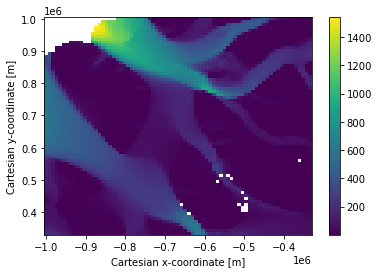

In [6]:
speed.isel(x=slice(4000,5500,20), y = slice(4000,5500,20)).plot()
